In [1]:
import subprocess,os,copy,pickle,re,time,itertools,random
import numpy as np
import statsmodels.api as sm
import math as ma
import pandas as pd
import numpy as np
import celldiscoveryutilities as utils
# Import 3rd party packages
from sklearn import  metrics, neighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.utils.validation import check_array
from scipy.stats import poisson, binom
from numpy.random import beta, poisson
import multiprocessing as mp
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.sparse import issparse
%matplotlib inline

/anaconda/lib/python3.6/site-packages/numba/errors.py:131: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
#%%script false
split_groups =['cells_count','modification_method', 'clustering_method', 'randomize_cells_labels','method',
               'top_var_genes_cut_off','top_var_genes_included', 'pca_components','post_mod_genes','bin_start',
               'bin_end']
replicates_grps=['cells_count','modification_method', 'clustering_method','fc','genes_count', 
                 'randomize_cells_labels','method','top_var_genes_cut_off','top_var_genes_included',
                 'normalization_method', 'pca_components','bin_start','bin_end','protocol']
hue='protocol'
#homo_scores_df['genes_count']=homo_scores_df.len_mod_and_var_genes.values
replicates_cut_off=5
out_dir=None
out_dir='../results/protocols/figures'
fc_list=[0.5,3,5,10]   
#fc_list=None
#fc_order=[0.2,0.5,2,5]
#fc_order=None
x_axis_subset=[5,10,30,50,100]
#x_axis_subset=None
in_col_wrap=4
show_reps_counts=['fc','genes_count',hue]
show_reps_counts=None
#hue_order=['SmartSeq','Smartseq2','SCRBseq','DropSeq','MARSseq','CELseq2']
hue_order=['Smartseq2', 'CELseq2', 'DropSeq', 'SCRBseq', 'Smartseq', 'MARSseq']
#hue_order=None
#Globala_variables
sns.set_context(context='paper',rc={'style':'white'})
#sns.set_palette(palette='colorblind')
#palette_dict='bright'
x_axis='genes_count'
boxprops_dict=dict(linewidth=0)
reps_limit=5
boxplot_mean=True
plot_type='bar'
temp_palette={'SCRBseq': (0.00784313725490196, 0.24313725490196078, 1.0),
              'Smartseq2': (1.0, 0.48627450980392156, 0.0),
              'CELseq2': (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
              'MARSseq': (0.9098039215686274, 0.0, 0.043137254901960784),
              'DropSeq': (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
              'Smartseq': (0.6235294117647059, 0.2823529411764706, 0.0)}

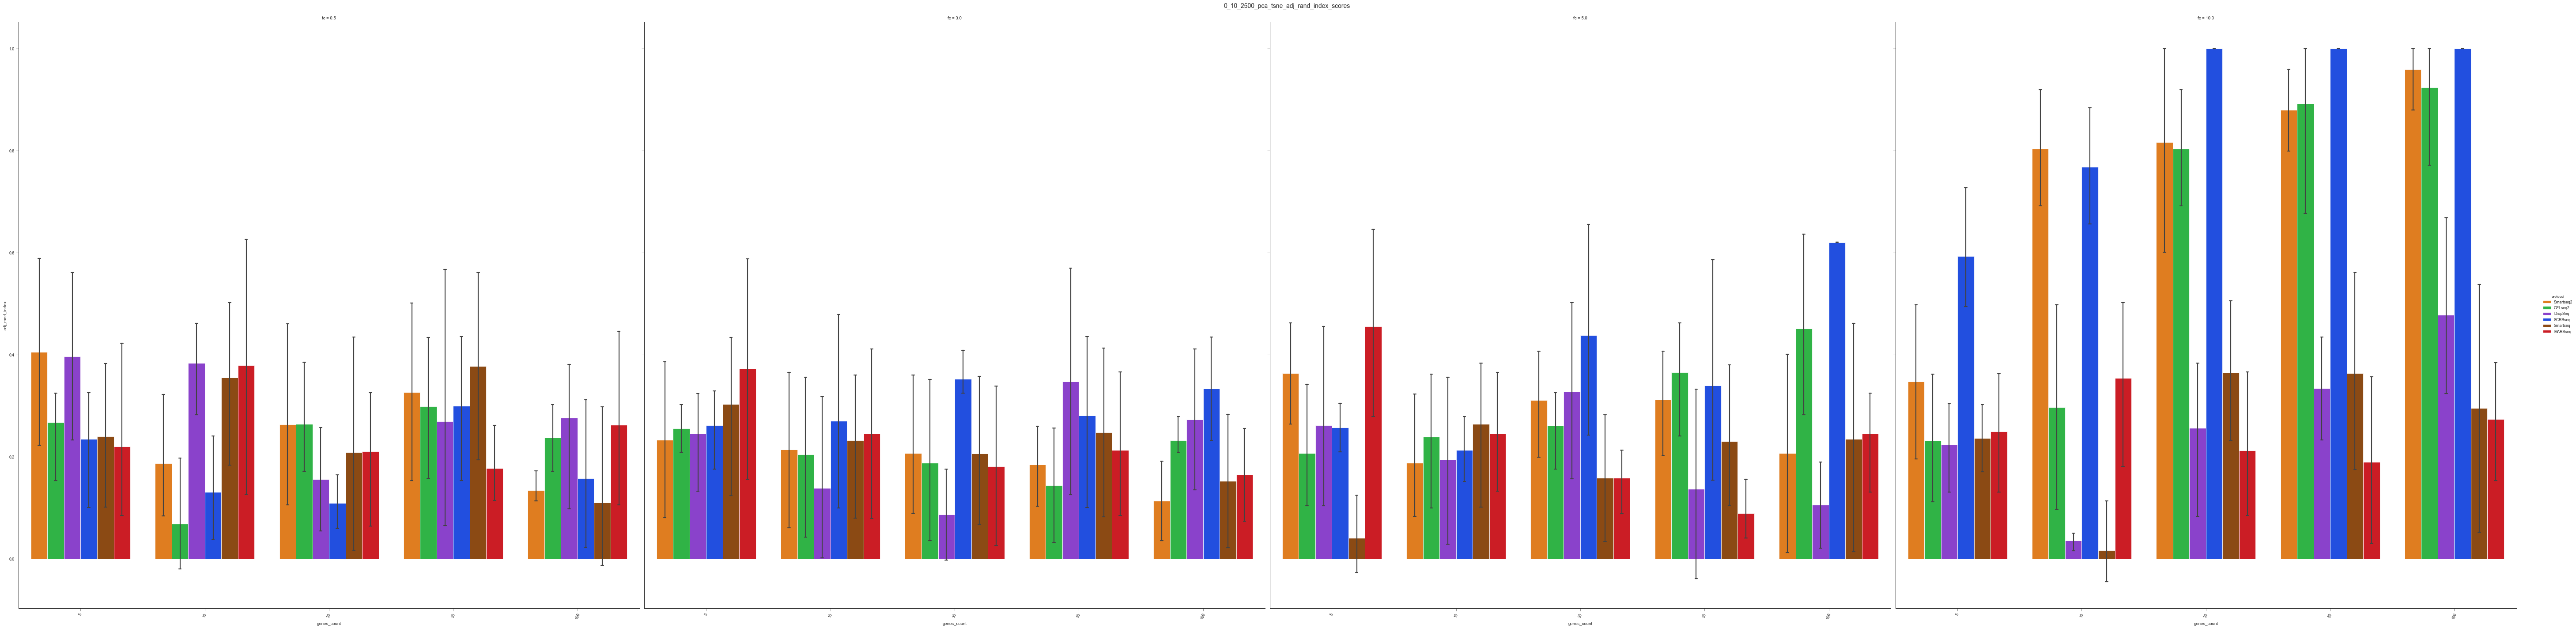

In [3]:
low_expr_genes_homo_scores_df=pd.read_pickle(path='../results/low_results.pkl',compression='gzip')
utils.plot_classification_scores_between_experiments(expriment_path=low_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='adj_rand_index',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

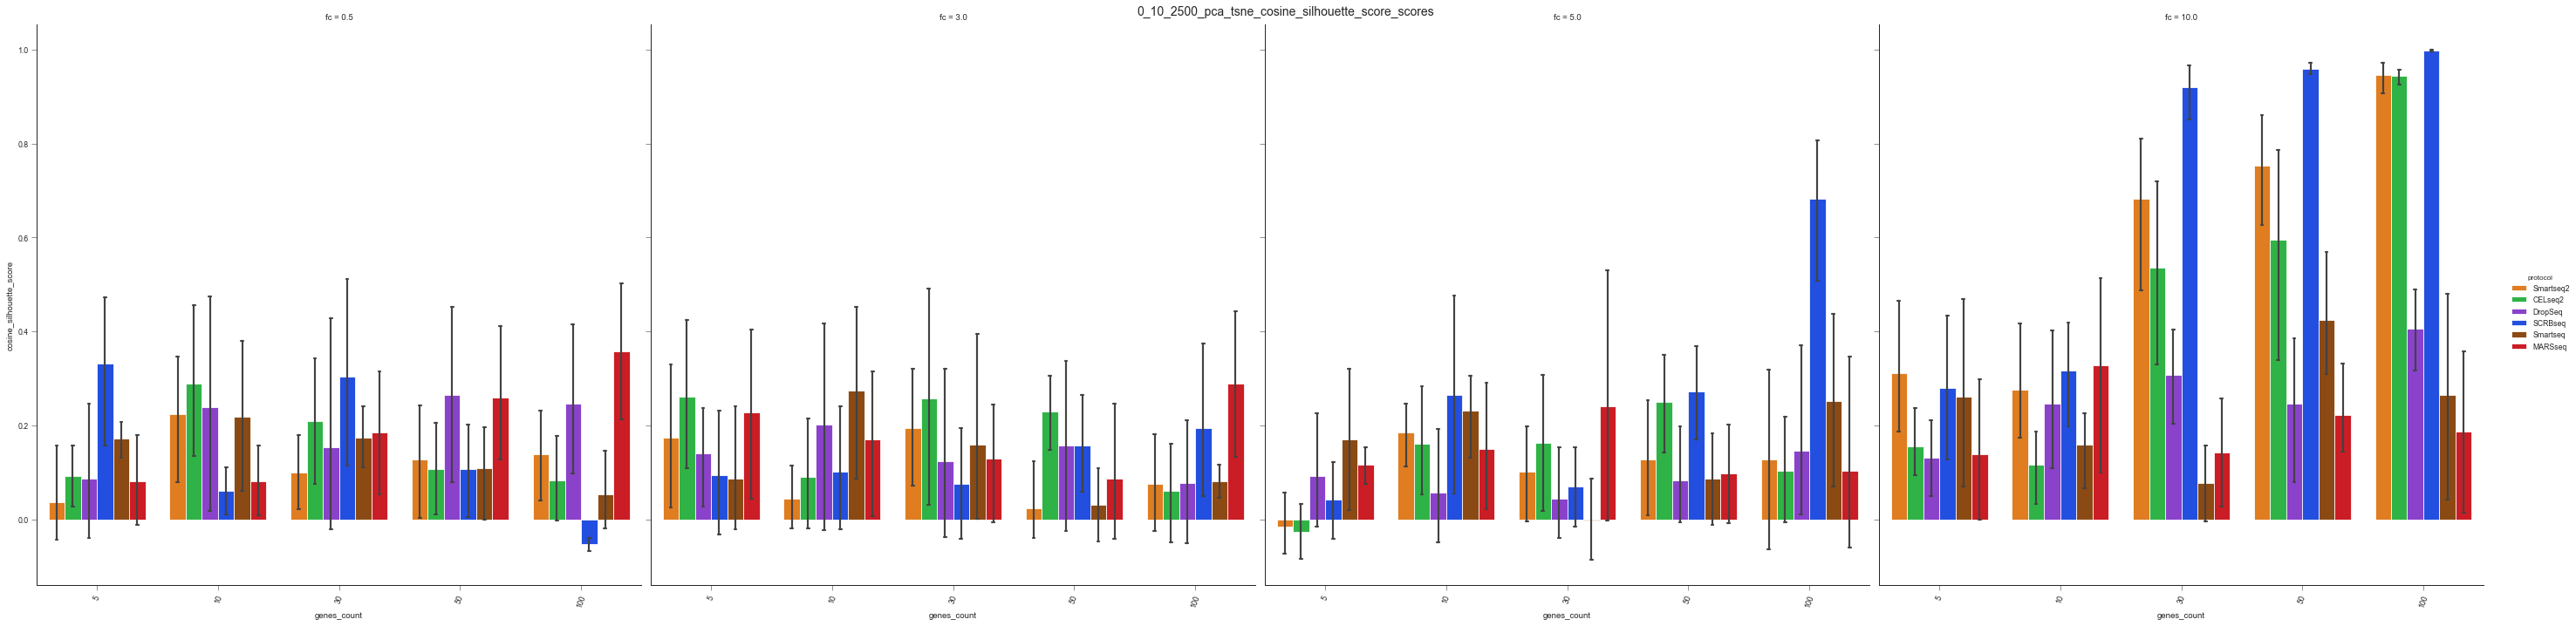

In [4]:
utils.plot_classification_scores_between_experiments(expriment_path=low_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='cosine_silhouette_score',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=10,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

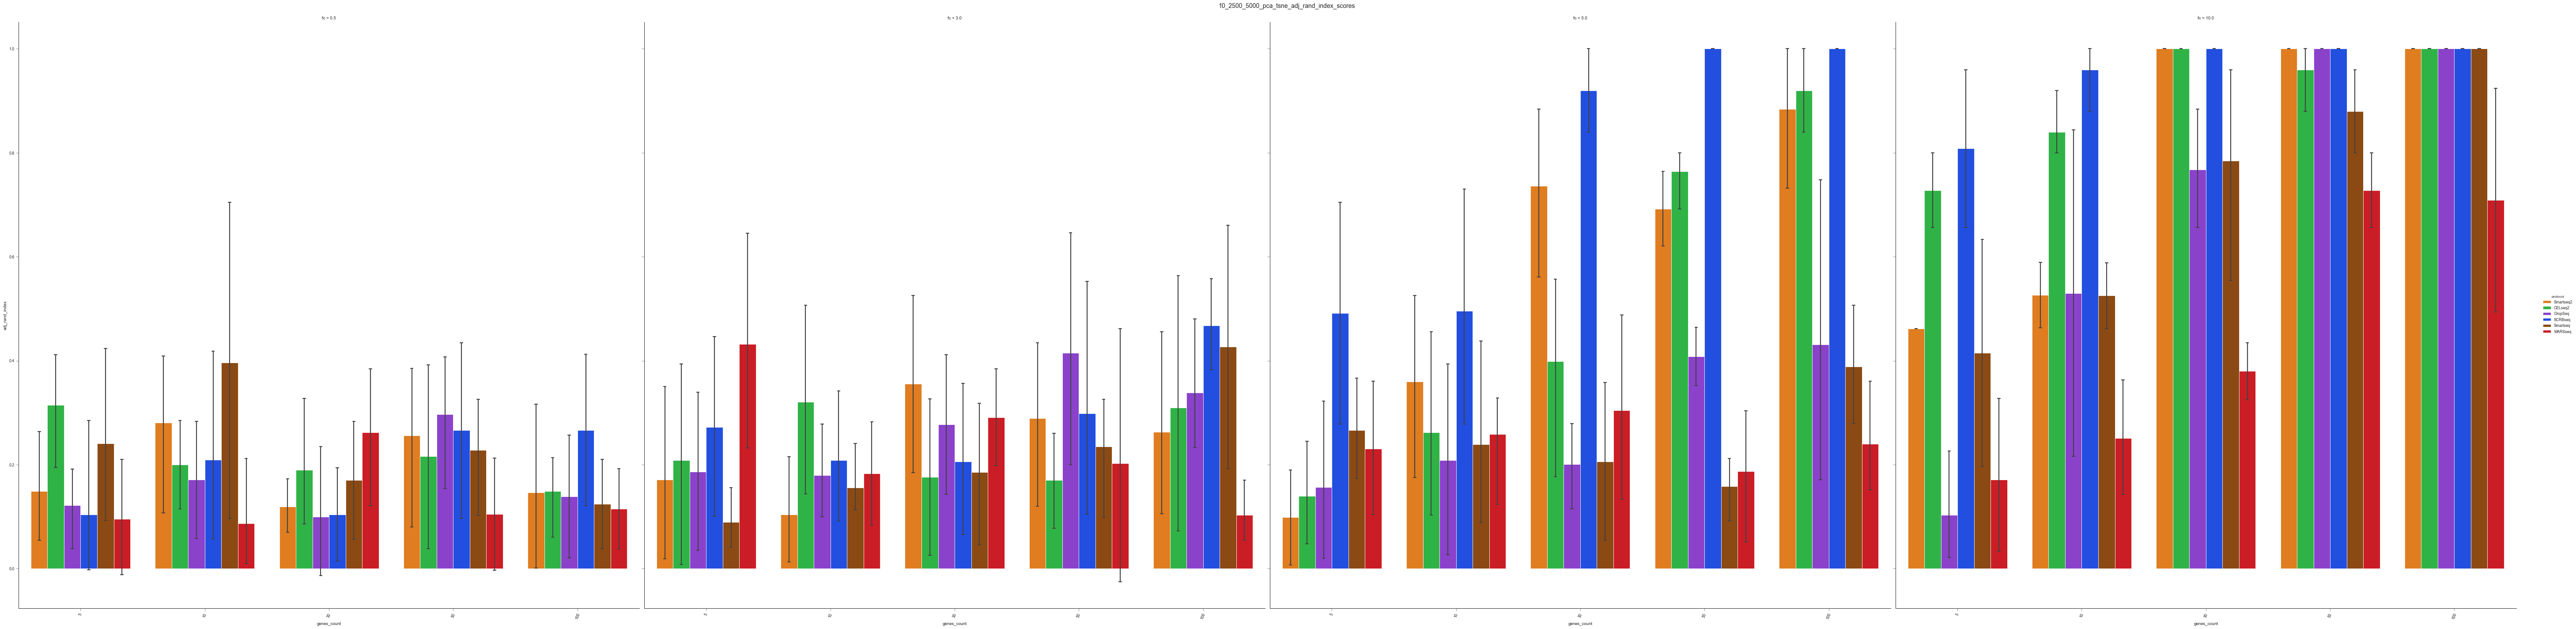

In [5]:
low_mid_expr_genes_homo_scores_df=pd.read_pickle(path='../results/low_mid_results.pkl',compression='gzip')
utils.plot_classification_scores_between_experiments(expriment_path=low_mid_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='adj_rand_index',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

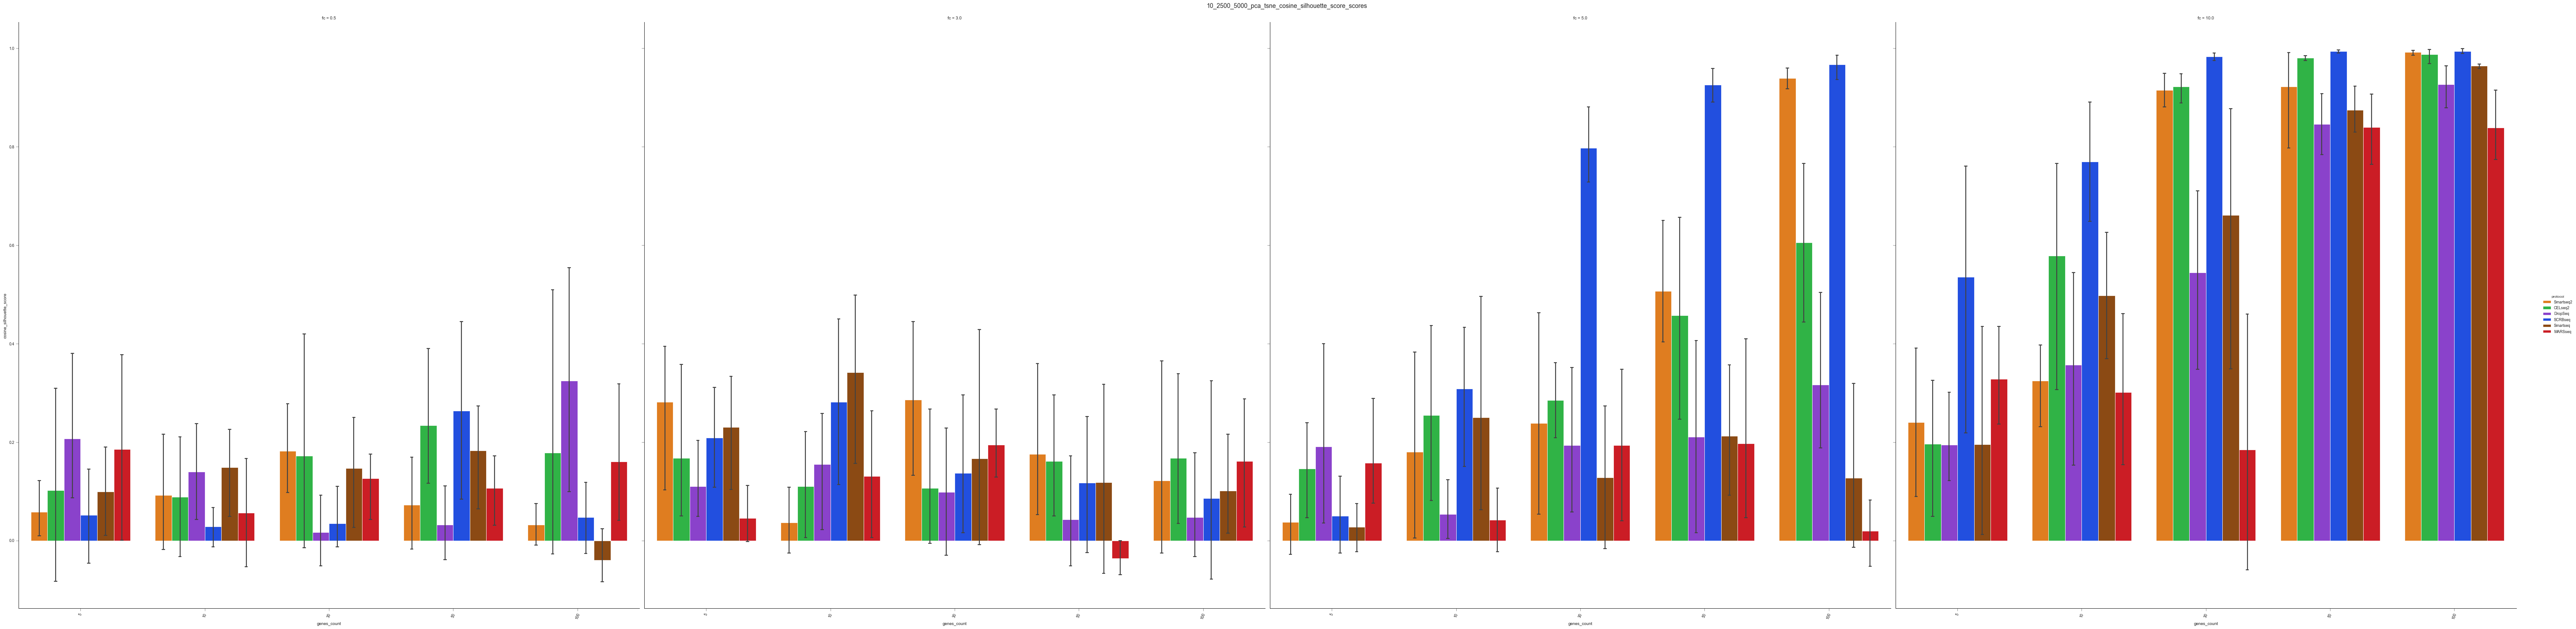

In [6]:
utils.plot_classification_scores_between_experiments(expriment_path=low_mid_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='cosine_silhouette_score',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

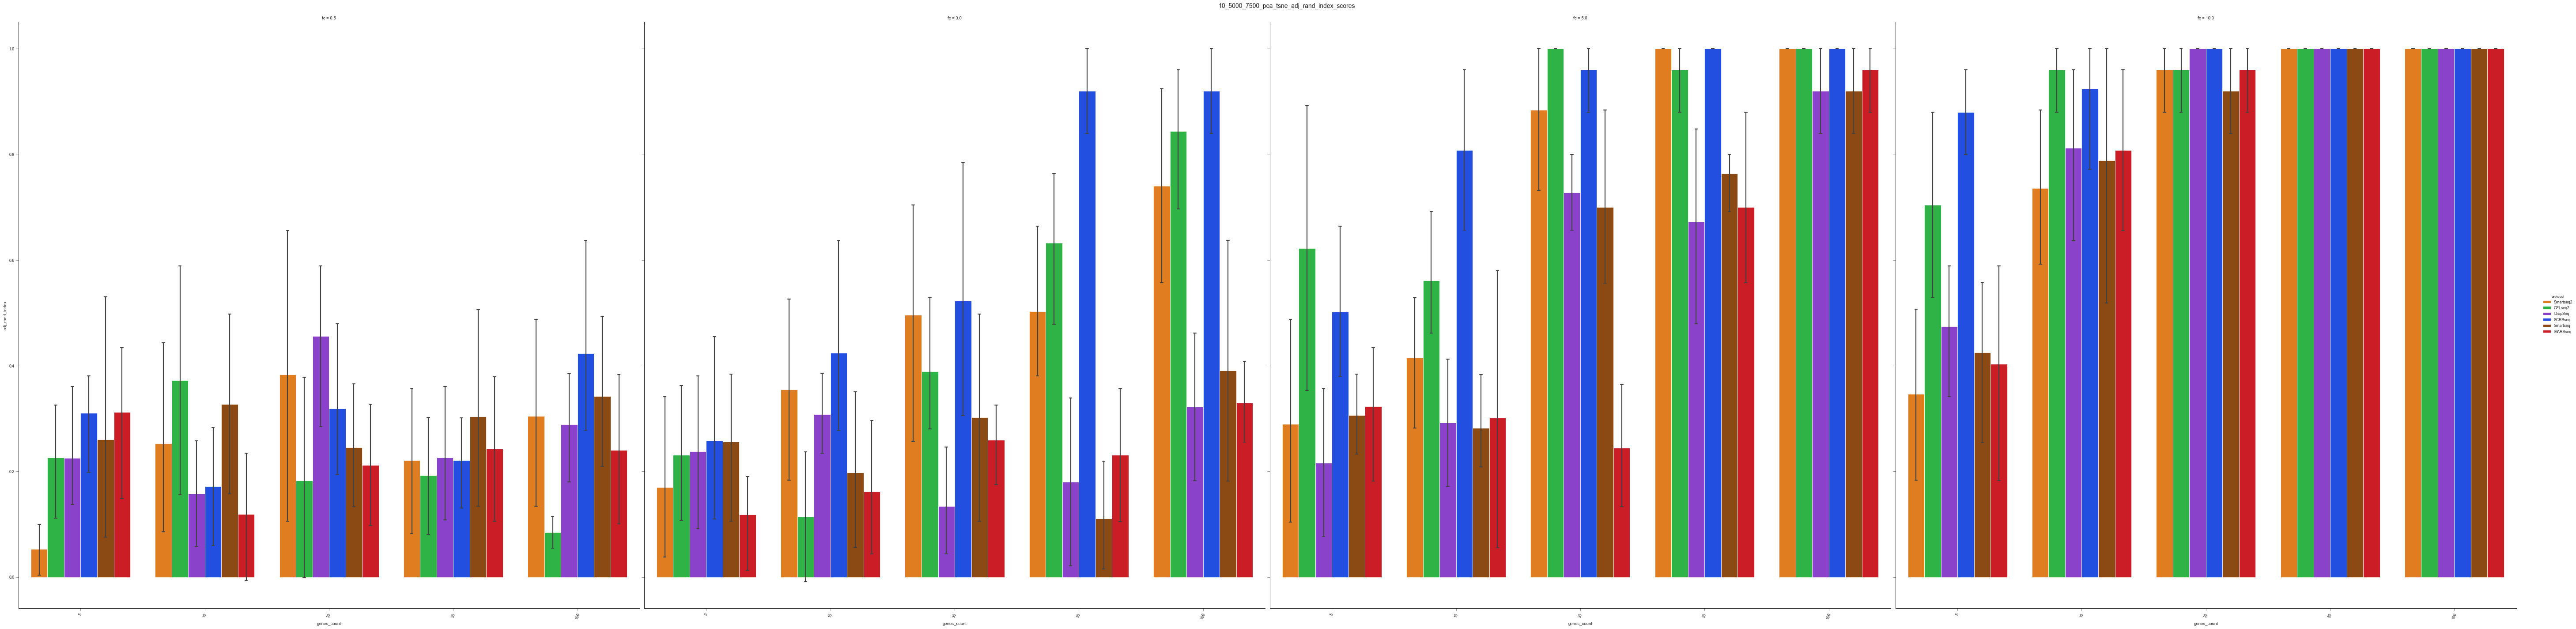

In [7]:
mid_expr_genes_homo_scores_df=pd.read_pickle(path='../results/mid_results.pkl',compression='gzip')
utils.plot_classification_scores_between_experiments(expriment_path=mid_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='adj_rand_index',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

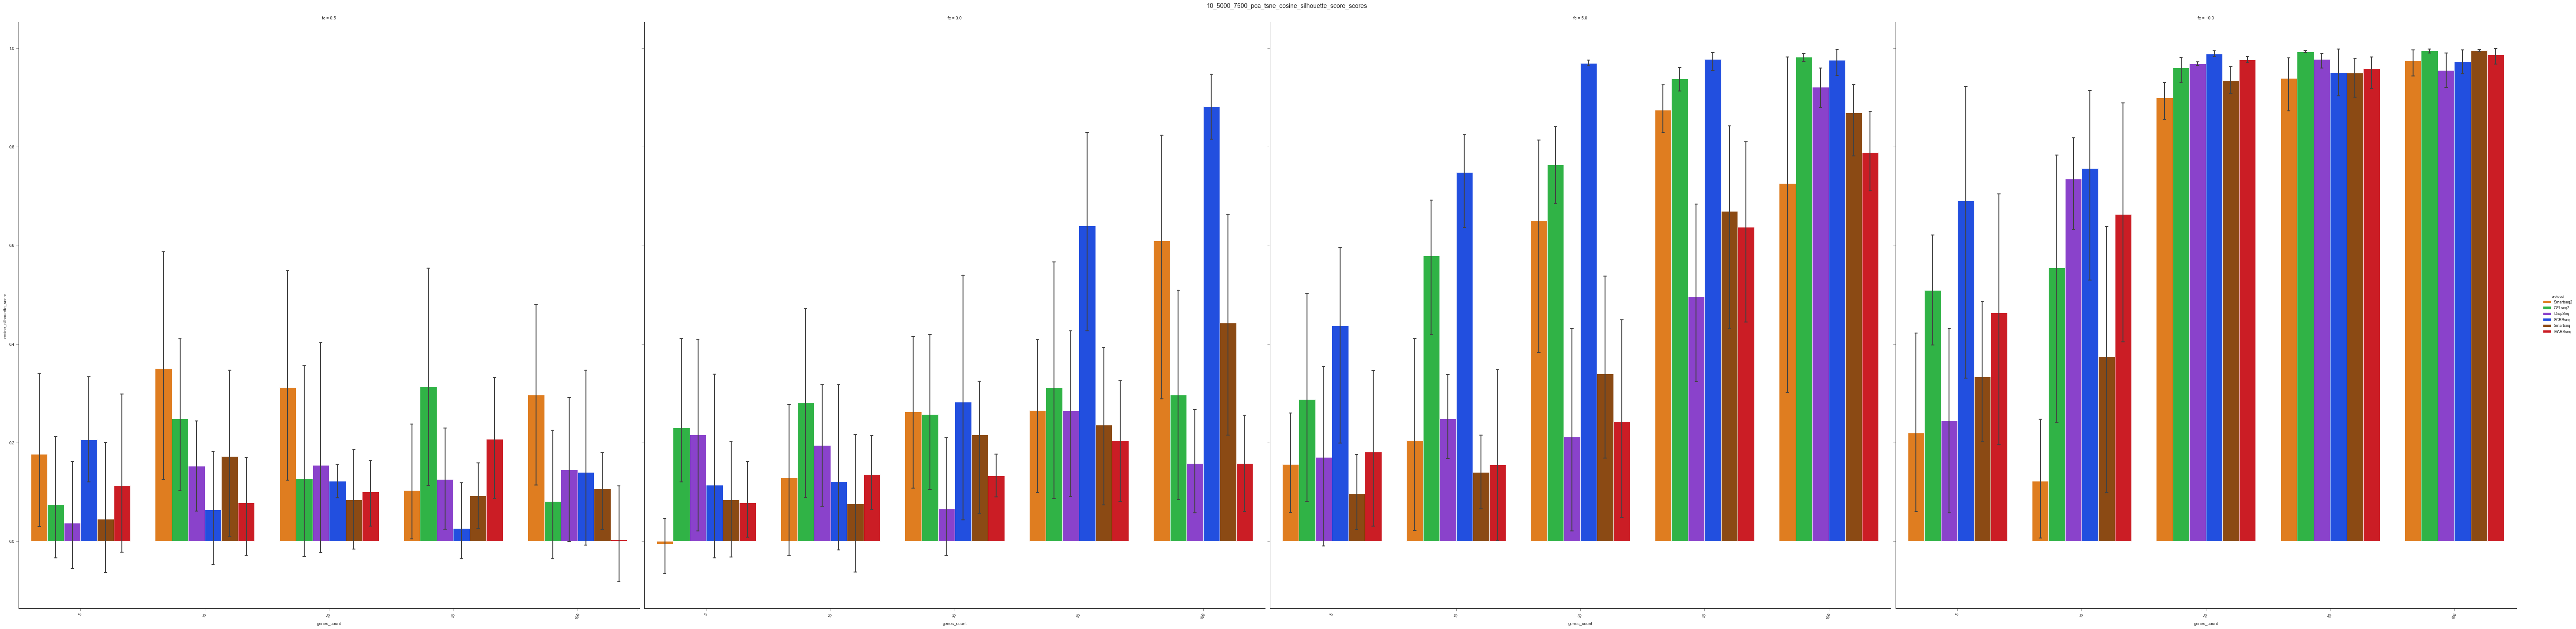

In [8]:
utils.plot_classification_scores_between_experiments(expriment_path=mid_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='cosine_silhouette_score',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

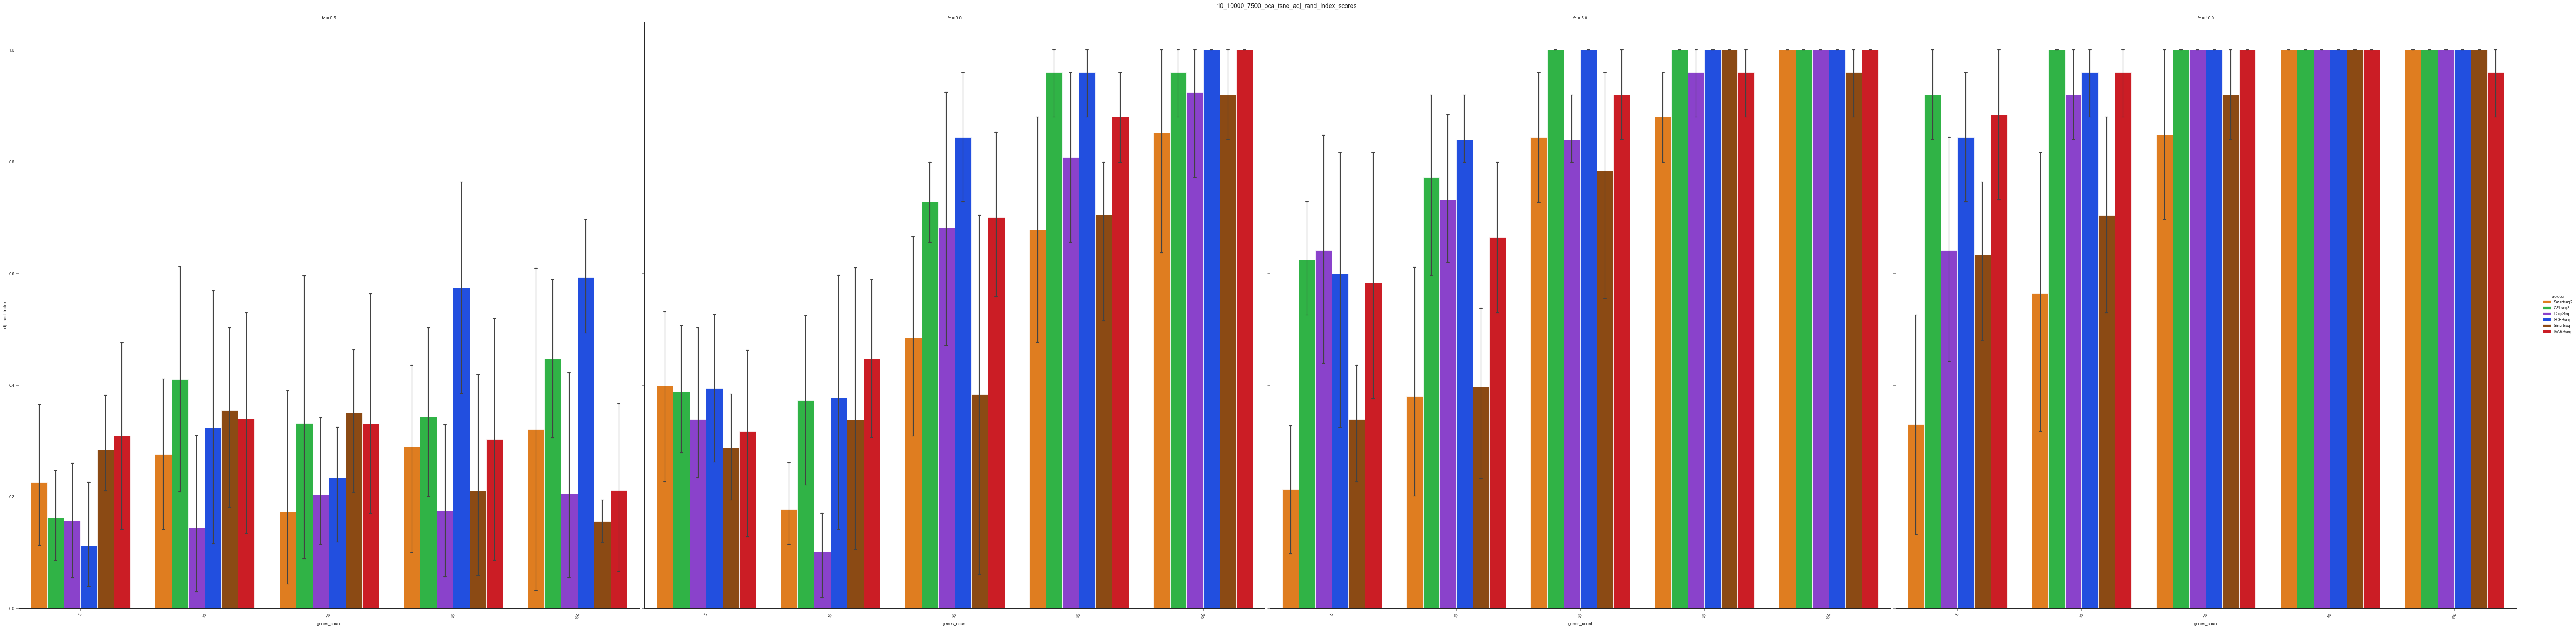

In [9]:
high_expr_genes_homo_scores_df=pd.read_pickle(path='../results/high_results.pkl',compression='gzip')
utils.plot_classification_scores_between_experiments(expriment_path=high_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='adj_rand_index',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   

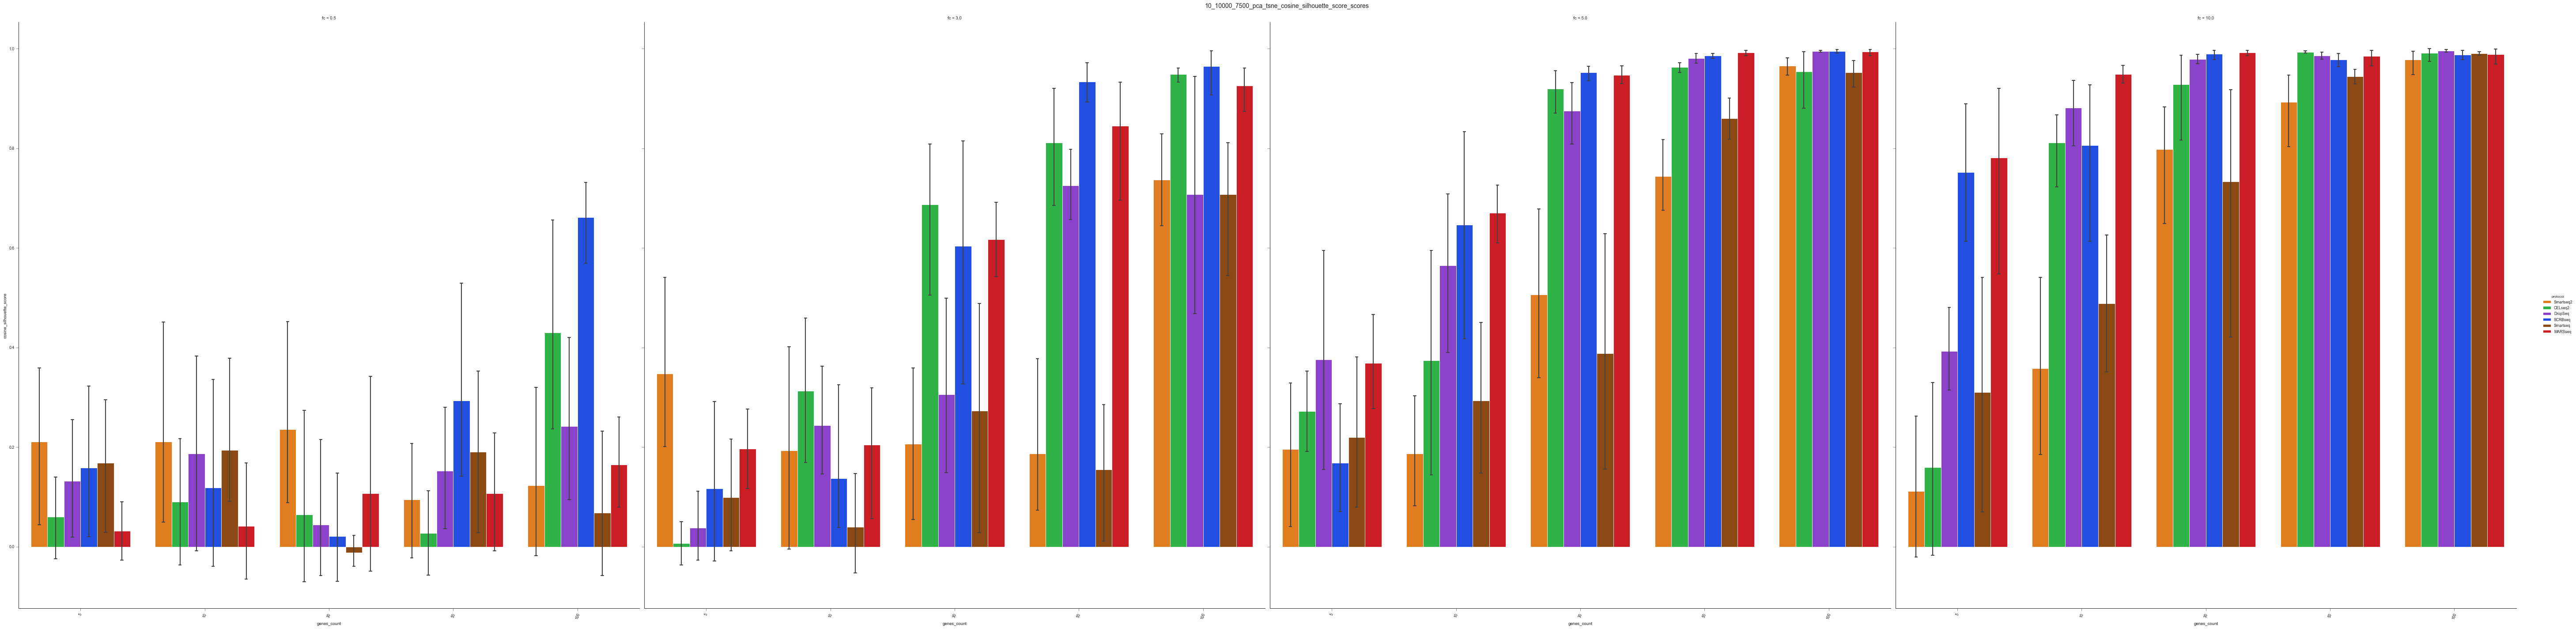

In [10]:
utils.plot_classification_scores_between_experiments(expriment_path=high_expr_genes_homo_scores_df, out_dir=out_dir,
                                                     x_axis=x_axis,split_groups=split_groups,
                                                     replicates_grps=replicates_grps,
                                                     y_axis='cosine_silhouette_score',in_kind=plot_type,ci=95,
                                                     in_col_wrap=in_col_wrap,replicates_per_grp=replicates_cut_off,
                                                     col_subset=fc_list,hue=hue,hue_order=hue_order,
                                                     x_axis_subset=x_axis_subset,col_order_value=None,
                                                     show_reps_counts=show_reps_counts,
                                                     palette=temp_palette,facet_size=20,add_swarm=False,
                                                     swarm_points_size=5.0,x_axis_rotation=70,
                                                     boxplot_mean=boxplot_mean,
                                                     boxprops=boxprops_dict,boxplot_outliers=False,
                                                     sharex=False,sharey=True,errwidth=0.0001,capsize=0.02, 
                                                     limit=reps_limit)   